# Salary Estimation Using K-Nearest Neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.shape

(48842, 15)

In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Replacing special characters column names

In [7]:
df.rename(columns={'capital-gain': 'capital gain', 'capital-loss': 'capital loss', 'native-country': 'country','hours-per-week': 'hours per week','marital-status': 'marital'}, inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital',
       'occupation', 'relationship', 'race', 'gender', 'capital gain',
       'capital loss', 'hours per week', 'country', 'income'],
      dtype='object')

## Data Cleaning

In [8]:
df.isin(['?']).sum(axis=0)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital               0
occupation         2809
relationship          0
race                  0
gender                0
capital gain          0
capital loss          0
hours per week        0
country             857
income                0
dtype: int64

In [9]:
unclean_columns= ['workclass', 'occupation', 'country']
for col in unclean_columns:
    df[col]= df[col].replace('?', np.nan)

In [10]:
df.isin(['?']).sum(axis=0)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital            0
occupation         0
relationship       0
race               0
gender             0
capital gain       0
capital loss       0
hours per week     0
country            0
income             0
dtype: int64

### Dropping nan values

In [11]:
df.dropna(how='any',inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital          45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital gain     45222 non-null  int64 
 11  capital loss     45222 non-null  int64 
 12  hours per week   45222 non-null  int64 
 13  country          45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


## Feature Engineering

### running a loop of value_counts of each column to find out unique values. 

In [13]:
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- age ---
36    1283
33    1279
31    1274
35    1272
23    1241
      ... 
85       5
88       5
89       1
86       1
87       1
Name: age, Length: 74, dtype: int64
---- workclass ---
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64
---- fnlwgt ---
203488    21
120277    18
125892    18
113364    17
126569    17
          ..
556660     1
340043     1
337992     1
124818     1
65584      1
Name: fnlwgt, Length: 26741, dtype: int64
---- education ---
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int

## dropping based on uniquness of data from the dataset 

In [14]:
df.drop(['educational-num','age', 'hours per week', 'fnlwgt', 'capital gain','capital loss', 'country'], axis=1, inplace=True)

In [15]:
df.head()

,workclass,education,marital,occupation,relationship,race,gender,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,>50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,<=50K


In [16]:
df['income']= df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [17]:
df.head()

,workclass,education,marital,occupation,relationship,race,gender,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,1
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,1
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,0


In [18]:
#gender
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1}).astype(int)
#race
df['race'] = df['race'].map({'Black': 0, 'Asian-Pac-Islander': 1,'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)
#marital
df['marital'] = df['marital'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)
#workclass
df['workclass'] = df['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6}).astype(int)

In [19]:
df.isna().sum()

workclass       0
education       0
marital         0
occupation      0
relationship    0
race            0
gender          0
income          0
dtype: int64

In [20]:
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- workclass ---
5    33307
6     3796
4     3100
1     1946
0     1646
2     1406
3       21
Name: workclass, dtype: int64
---- education ---
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int64
---- marital ---
2    21055
5    14598
4     6297
3     1411
1     1277
0      552
6       32
Name: marital, dtype: int64
---- occupation ---
Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales                5408
Other-service        4808
Machine-op-inspct    2970
Transport-moving     2316
Handlers-cleaners    2046
Farming-fishing      1480
Tech-support         1420
Protective-serv       976
Priv-house-serv    

In [21]:
df['relationship']= df['relationship'].map({'Husband': 0, 'Not-in-family': 1, 'Own-child': 2, 'Unmarried': 3, 'Wife': 4, 'Other-relative': 6}).astype(int)

In [22]:

df['education']= df['education'].map({'Preschool': 0, '1st-4th': 1, '5th-6th': 2, '7th-8th': 3,'9th':4, '10th': 5, '11th': 6, '12th': 7, 'HS-grad': 8, 'Some-college': 9, 'Bachelors': 10,'Masters': 11, 'Assoc-voc': 12, 'Assoc-acdm': 13, 'Prof-school': 14, 'Doctorate': 15,'Preschool': 16   }).astype(int)

In [23]:
df['occupation'] = df['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4, 'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10, 'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13,'Protective-serv':14}).astype(int)

In [24]:
df.head()

,workclass,education,marital,occupation,relationship,race,gender,income
0,5,6,5,6,2,0,0,0
1,5,8,2,1,0,3,0,0
2,4,13,2,14,0,3,0,1
3,5,9,2,6,0,0,0,1
5,5,5,5,13,1,3,0,0


## Data Visualization

In [25]:
columns= df.columns
columns

Index(['workclass', 'education', 'marital', 'occupation', 'relationship',
       'race', 'gender', 'income'],
      dtype='object')

<AxesSubplot:xlabel='workclass'>

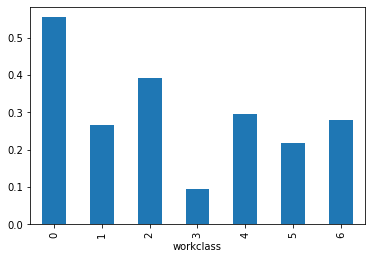

In [26]:
df.groupby('workclass').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='education'>

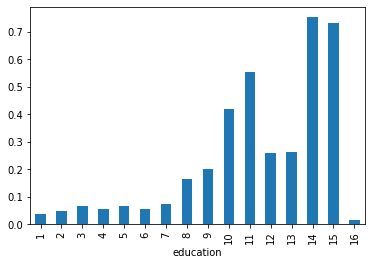

In [27]:
df.groupby('education').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='marital'>

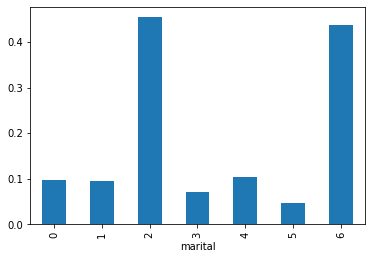

In [28]:
df.groupby('marital').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='occupation'>

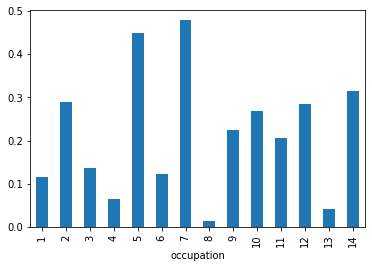

In [29]:
df.groupby('occupation').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='relationship'>

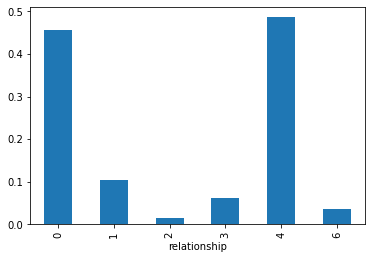

In [30]:
df.groupby('relationship').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='race'>

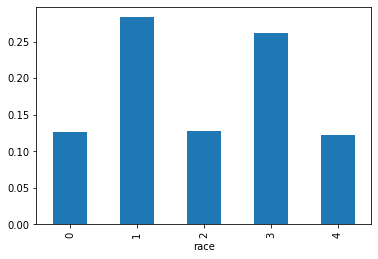

In [31]:
df.groupby('race').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='gender'>

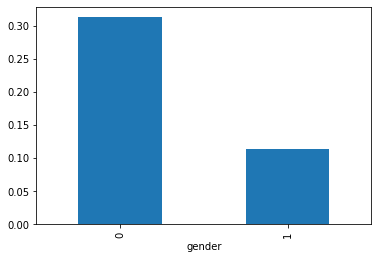

In [32]:
df.groupby('gender').income.mean().plot(kind='bar')

## Splitting the dataset

In [33]:
df.head()

,workclass,education,marital,occupation,relationship,race,gender,income
0,5,6,5,6,2,0,0,0
1,5,8,2,1,0,3,0,0
2,4,13,2,14,0,3,0,1
3,5,9,2,6,0,0,0,1
5,5,5,5,13,1,3,0,0


In [34]:
X= df.iloc[:,:-1].values

In [35]:
y= df.iloc[:,-1].values
y.shape

(45222,)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .25, random_state= 38)

In [37]:
X_train.shape

(33916, 7)

In [38]:
X_test.shape

(11306, 7)

In [39]:
y_train.shape

(33916,)

In [40]:
y_test.shape

(11306,)

## Scaling the dataset

In [41]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [42]:
X_train.shape

(33916, 7)

In [43]:
X_test.shape

(11306, 7)

## Choosing best k value

Text(0, 0.5, 'Mean error')

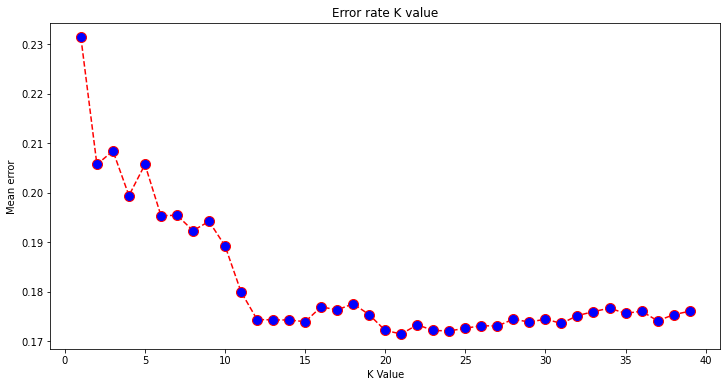

In [44]:
error= []
from sklearn.neighbors import KNeighborsClassifier

for i in range(1, 40):
    model= KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    pred_i= model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1,40), error, color= 'red', linestyle='dashed', marker= 'o', markerfacecolor= 'blue', markersize= 10)
plt.title('Error rate K value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

In [45]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors=2, metric= 'minkowski', p=2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

## Prediction for all test set

In [46]:
y_pred= model.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

### Saving our model using pickle module

In [47]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

### load the model from disk

In [49]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7942685299840793
